In [2]:
# importing the necessary packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, classification_report,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
           

print('imported libraries')

imported libraries


In [3]:
#importing the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data understanding

In [4]:
#Getting the last 5 columns of the dataset

df.tail()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
# Getting the number of rows and columns in the dataframe

print("Data frame rows and columns :",df.shape)

Data frame rows and columns : (3333, 21)


# Data Preparation

In [6]:
#checking dataframe columns

print('dataframe columns:',df.columns)

dataframe columns: Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [7]:
#checking info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
#Getting statistics about the data

print("Stats about the data :", df.describe())

Stats about the data :        account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.

In [9]:
# Check for missing values
print(df.isnull().sum())


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


 - There are no missing values in the dataset

# Explatory Data Analysis

In [163]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical columns
print("Numerical columns:")
print(numerical_cols)

Numerical columns:
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


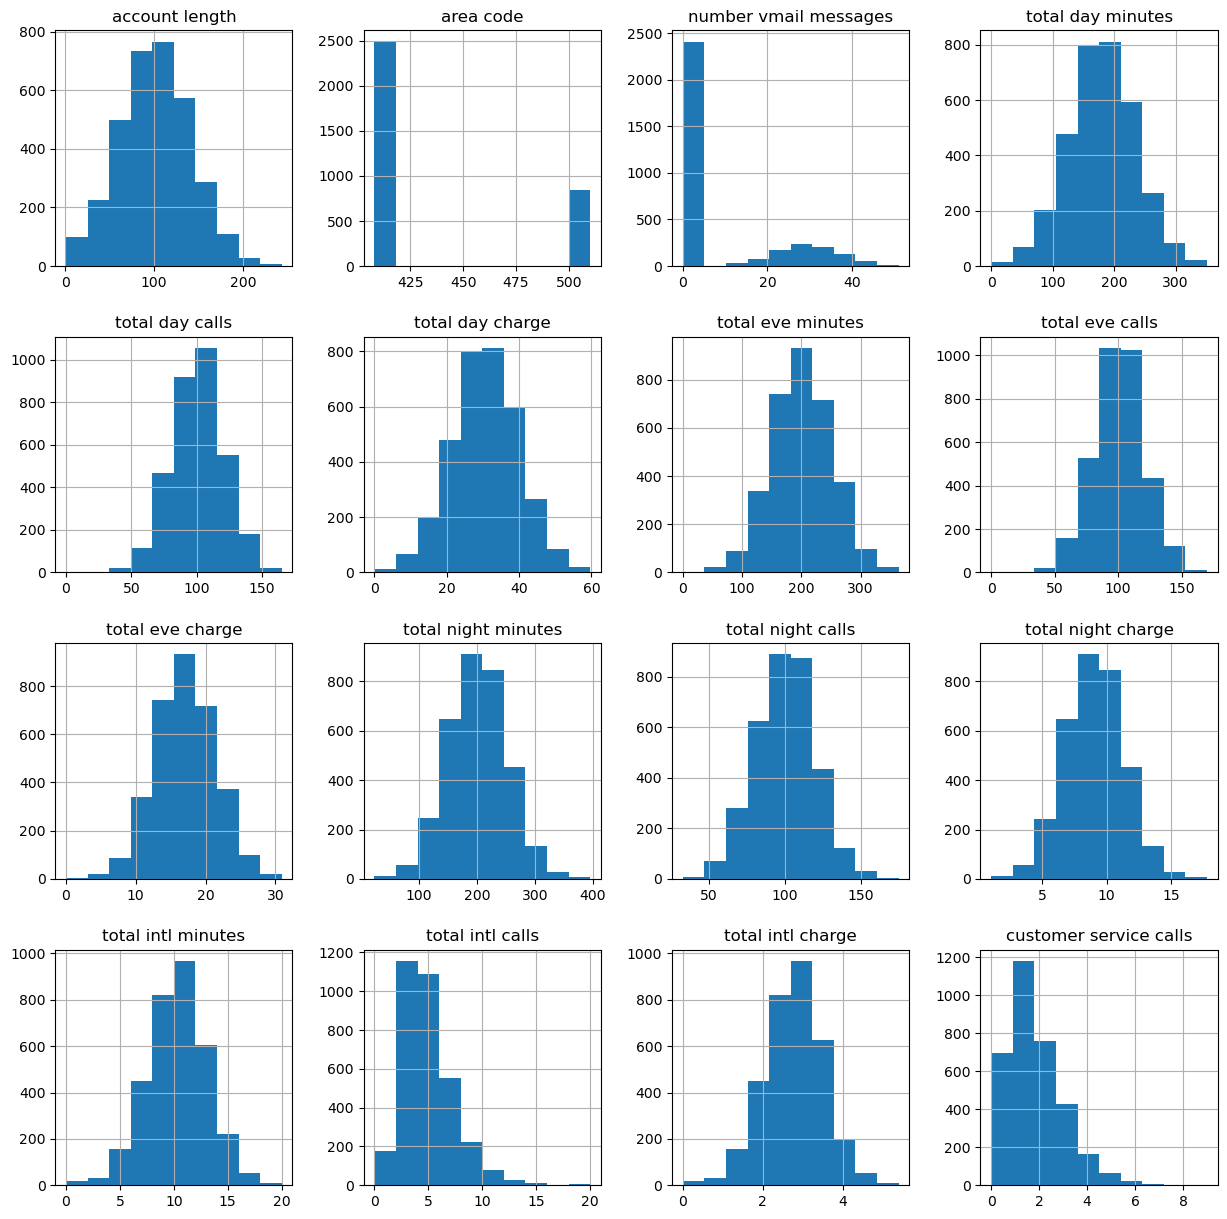

In [164]:
# Distribution of the numeric features

def plot_numeric_features(df):
  # select the columns that have numeric data type
  num_cols = df.select_dtypes(include=['int64', 'float64']).columns
  # plot a histogram for each numeric column
  df[num_cols].hist(figsize=(15,15))
  # show the plot
  plt.show()


# call the function
plot_numeric_features(df)


C:\Users\Derrick Masungo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Derrick Masungo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Derrick Masungo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

<AxesSubplot:xlabel='total eve charge', ylabel='Density'>

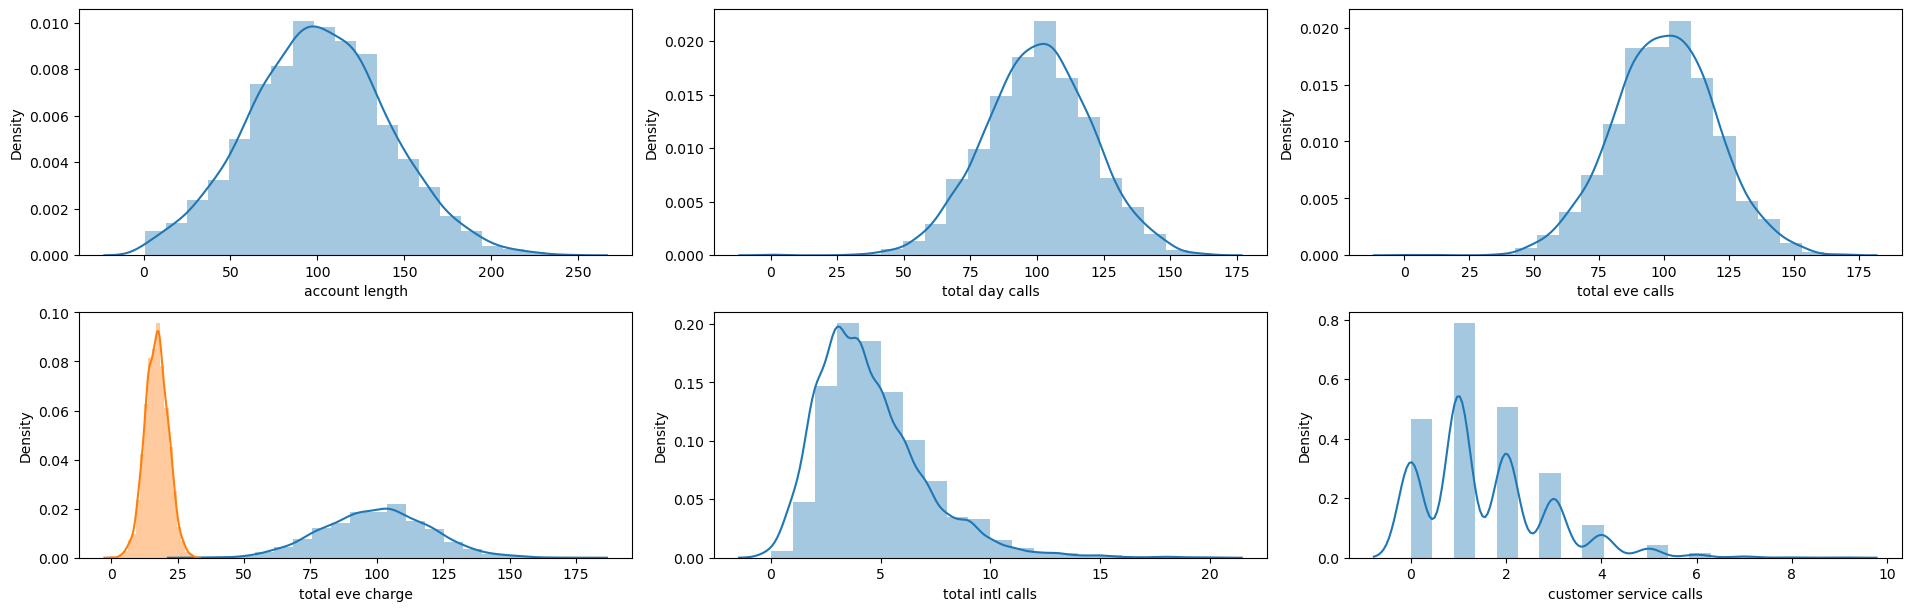

In [165]:
#Distribution plots for numeric features

f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

sns.distplot(df["total eve charge"], bins=20,ax=ax[1,0])


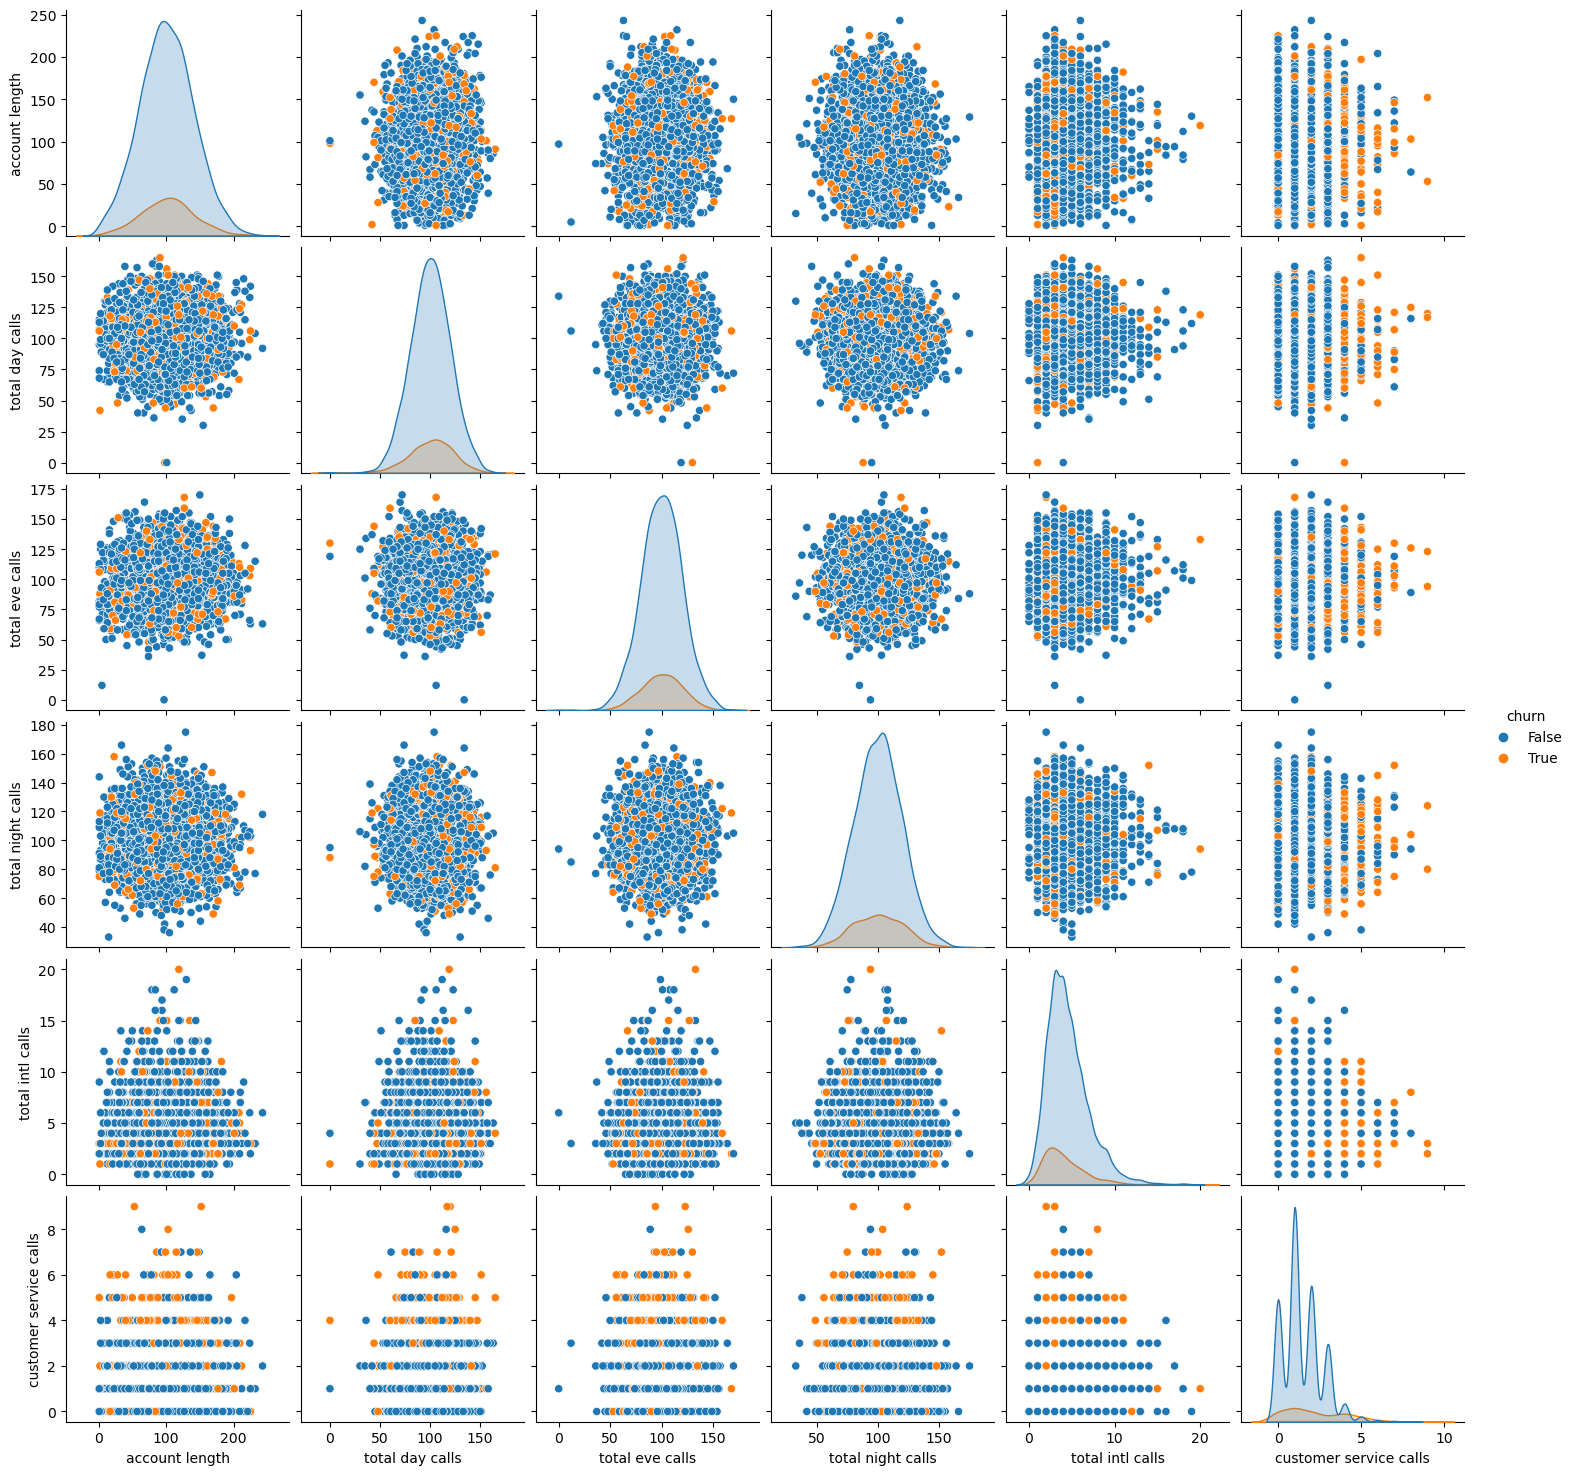

In [166]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

- Customer service calls and churn values are clearly related. Customers tend to stop using the service after making more than four calls.
- The number of customer service calls is a strong predictor of churn. After four calls, the likelihood of customers leaving the service increases significantly.
- There is a noticeable association between customer service calls and churn. The service retention rate drops sharply after customers make four or more calls.

#  Correlations 

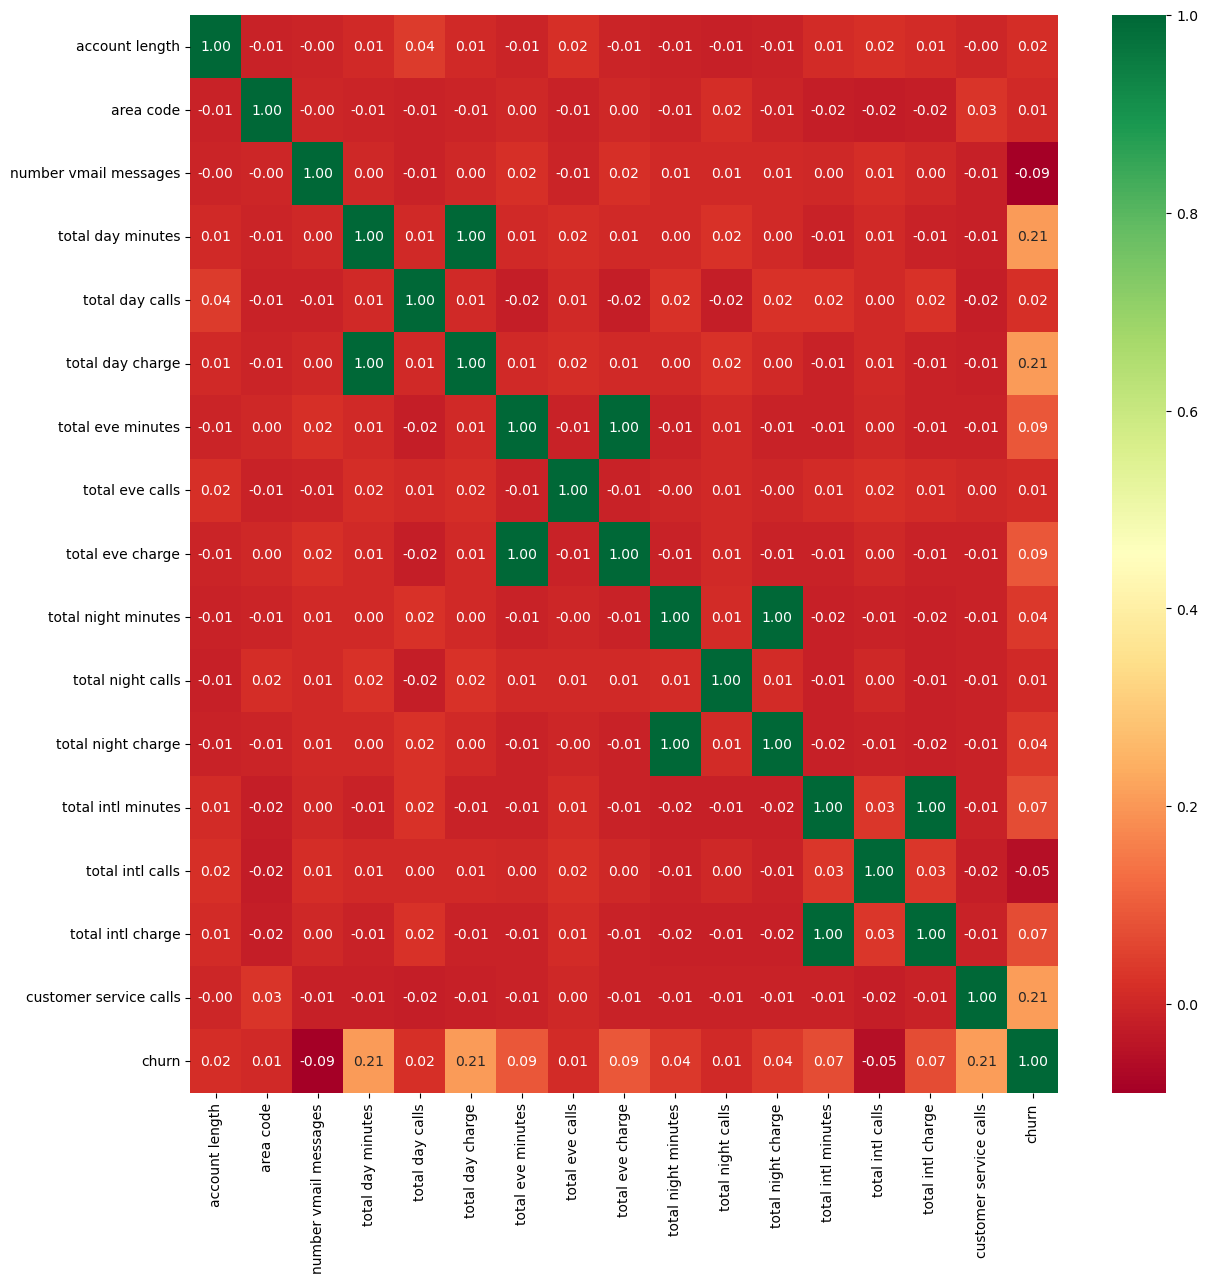

In [167]:
# Heatmap to show correlations
df_corr = df.corr()
f, ax = plt.subplots(figsize=(14, 14))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn', ax=ax)
plt.show()

Here we see that the most highly correlated positively features to independent feature churn is

- total day minutes
- total day charge
- customer service calls


In [10]:
# Dropping irrelevant column from the dataset

def drop_phone_number(df):
    df = df.drop("phone number", axis=1)
    return df
#call the function to remove the phone number column
df = drop_phone_number(df)
df.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
# checking for categorical columns in the dataset

def find_categorical_columns(df):
  # select the columns that have object or category data type
  cat_cols = df.select_dtypes(include=['object', 'category']).columns
  # return the list of column names
  return list(cat_cols)
 
# call the function
cat_cols = find_categorical_columns(df)
# print the result
print(f'The categorical columns are {cat_cols}')


The categorical columns are ['state', 'international plan', 'voice mail plan']


In [12]:
# categoricl columns
cat_cols = df[['state','voice mail plan','international plan']]

cat_cols.head()

,state,voice mail plan,international plan
0,KS,yes,no
1,OH,yes,no
2,NJ,no,no
3,OH,no,yes
4,OK,no,yes


In [13]:
#one hot encoding  the categorical columns
# Select the categorical columns
cat_cols = df[['state', 'voice mail plan', 'international plan']]

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(cat_cols)

# Print the one-hot encoded DataFrame
print(one_hot_encoded)

      state_AK  state_AL  state_AR  state_AZ  state_CA  state_CO  state_CT  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
3328         0         0         0         1         0         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         1   
3332         0         0         0         0         0         0         0   

      state_DC  state_DE  state_FL  ...  state_VA  state_VT  st

In [14]:
# Concatenate the one-hot encoded DataFrame with the main DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
df_encoded.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,voice mail plan_no,voice mail plan_yes,international plan_no,international plan_yes
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,1,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,1,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,1,0,1,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,1,0,0,1
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,1,0,0,1


In [15]:
#Dropping  the categorical columns  from the data 
df_encoded = df_encoded.drop(['state','international plan','voice mail plan'], axis=1)
df_encoded.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,voice mail plan_no,voice mail plan_yes,international plan_no,international plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,1,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,1,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,1,0,0,1
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,1,0,0,1


In [16]:
# Finding the target and the predictor variables 

y = df_encoded['churn']
X = df_encoded.drop('churn', axis=1)#dropping the target colun from the main dataframe

In [17]:
#checking  X Dataframe data types
X.dtypes

account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
                           ...   
state_WY                    uint8
voice mail plan_no          uint8
voice mail plan_yes         uint8
international plan_no       uint8
international plan_yes      uint8
Length: 71, dtype: object

In [18]:
#Normalizing X dataframe using standard scaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print the scaled DataFrame
print(X_scaled_df)

      account length  area code  number vmail messages  total day minutes  \
0           0.676489  -0.523603               1.234883           1.566767   
1           0.149065  -0.523603               1.307948          -0.333738   
2           0.902529  -0.523603              -0.591760           1.168304   
3          -0.428590  -0.688834              -0.591760           2.196596   
4          -0.654629  -0.523603              -0.591760          -0.240090   
...              ...        ...                    ...                ...   
3328        2.283878  -0.523603               2.038605          -0.432895   
3329       -0.830437  -0.523603              -0.591760           0.942447   
3330       -1.835055   1.718817              -0.591760           0.018820   
3331        2.082955   1.718817              -0.591760           0.624778   
3332       -0.679745  -0.523603               1.234883           1.003042   

      total day calls  total day charge  total eve minutes  total eve calls

In [19]:
# Encode categorical variable churn using one-hot encoding in y Dataframe
y = pd.get_dummies(y, columns=['churn'])# Encoded target variable
y.head() 

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


# Creating training and test sets

In [20]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=42)

print('completed splitting data')

completed splitting data


# Decision Tree

In [179]:
# Train a DT classifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# Model Evaluation

In [180]:
# Make predictions for test data
y_pred = clf.predict(X_test)
y_pred

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

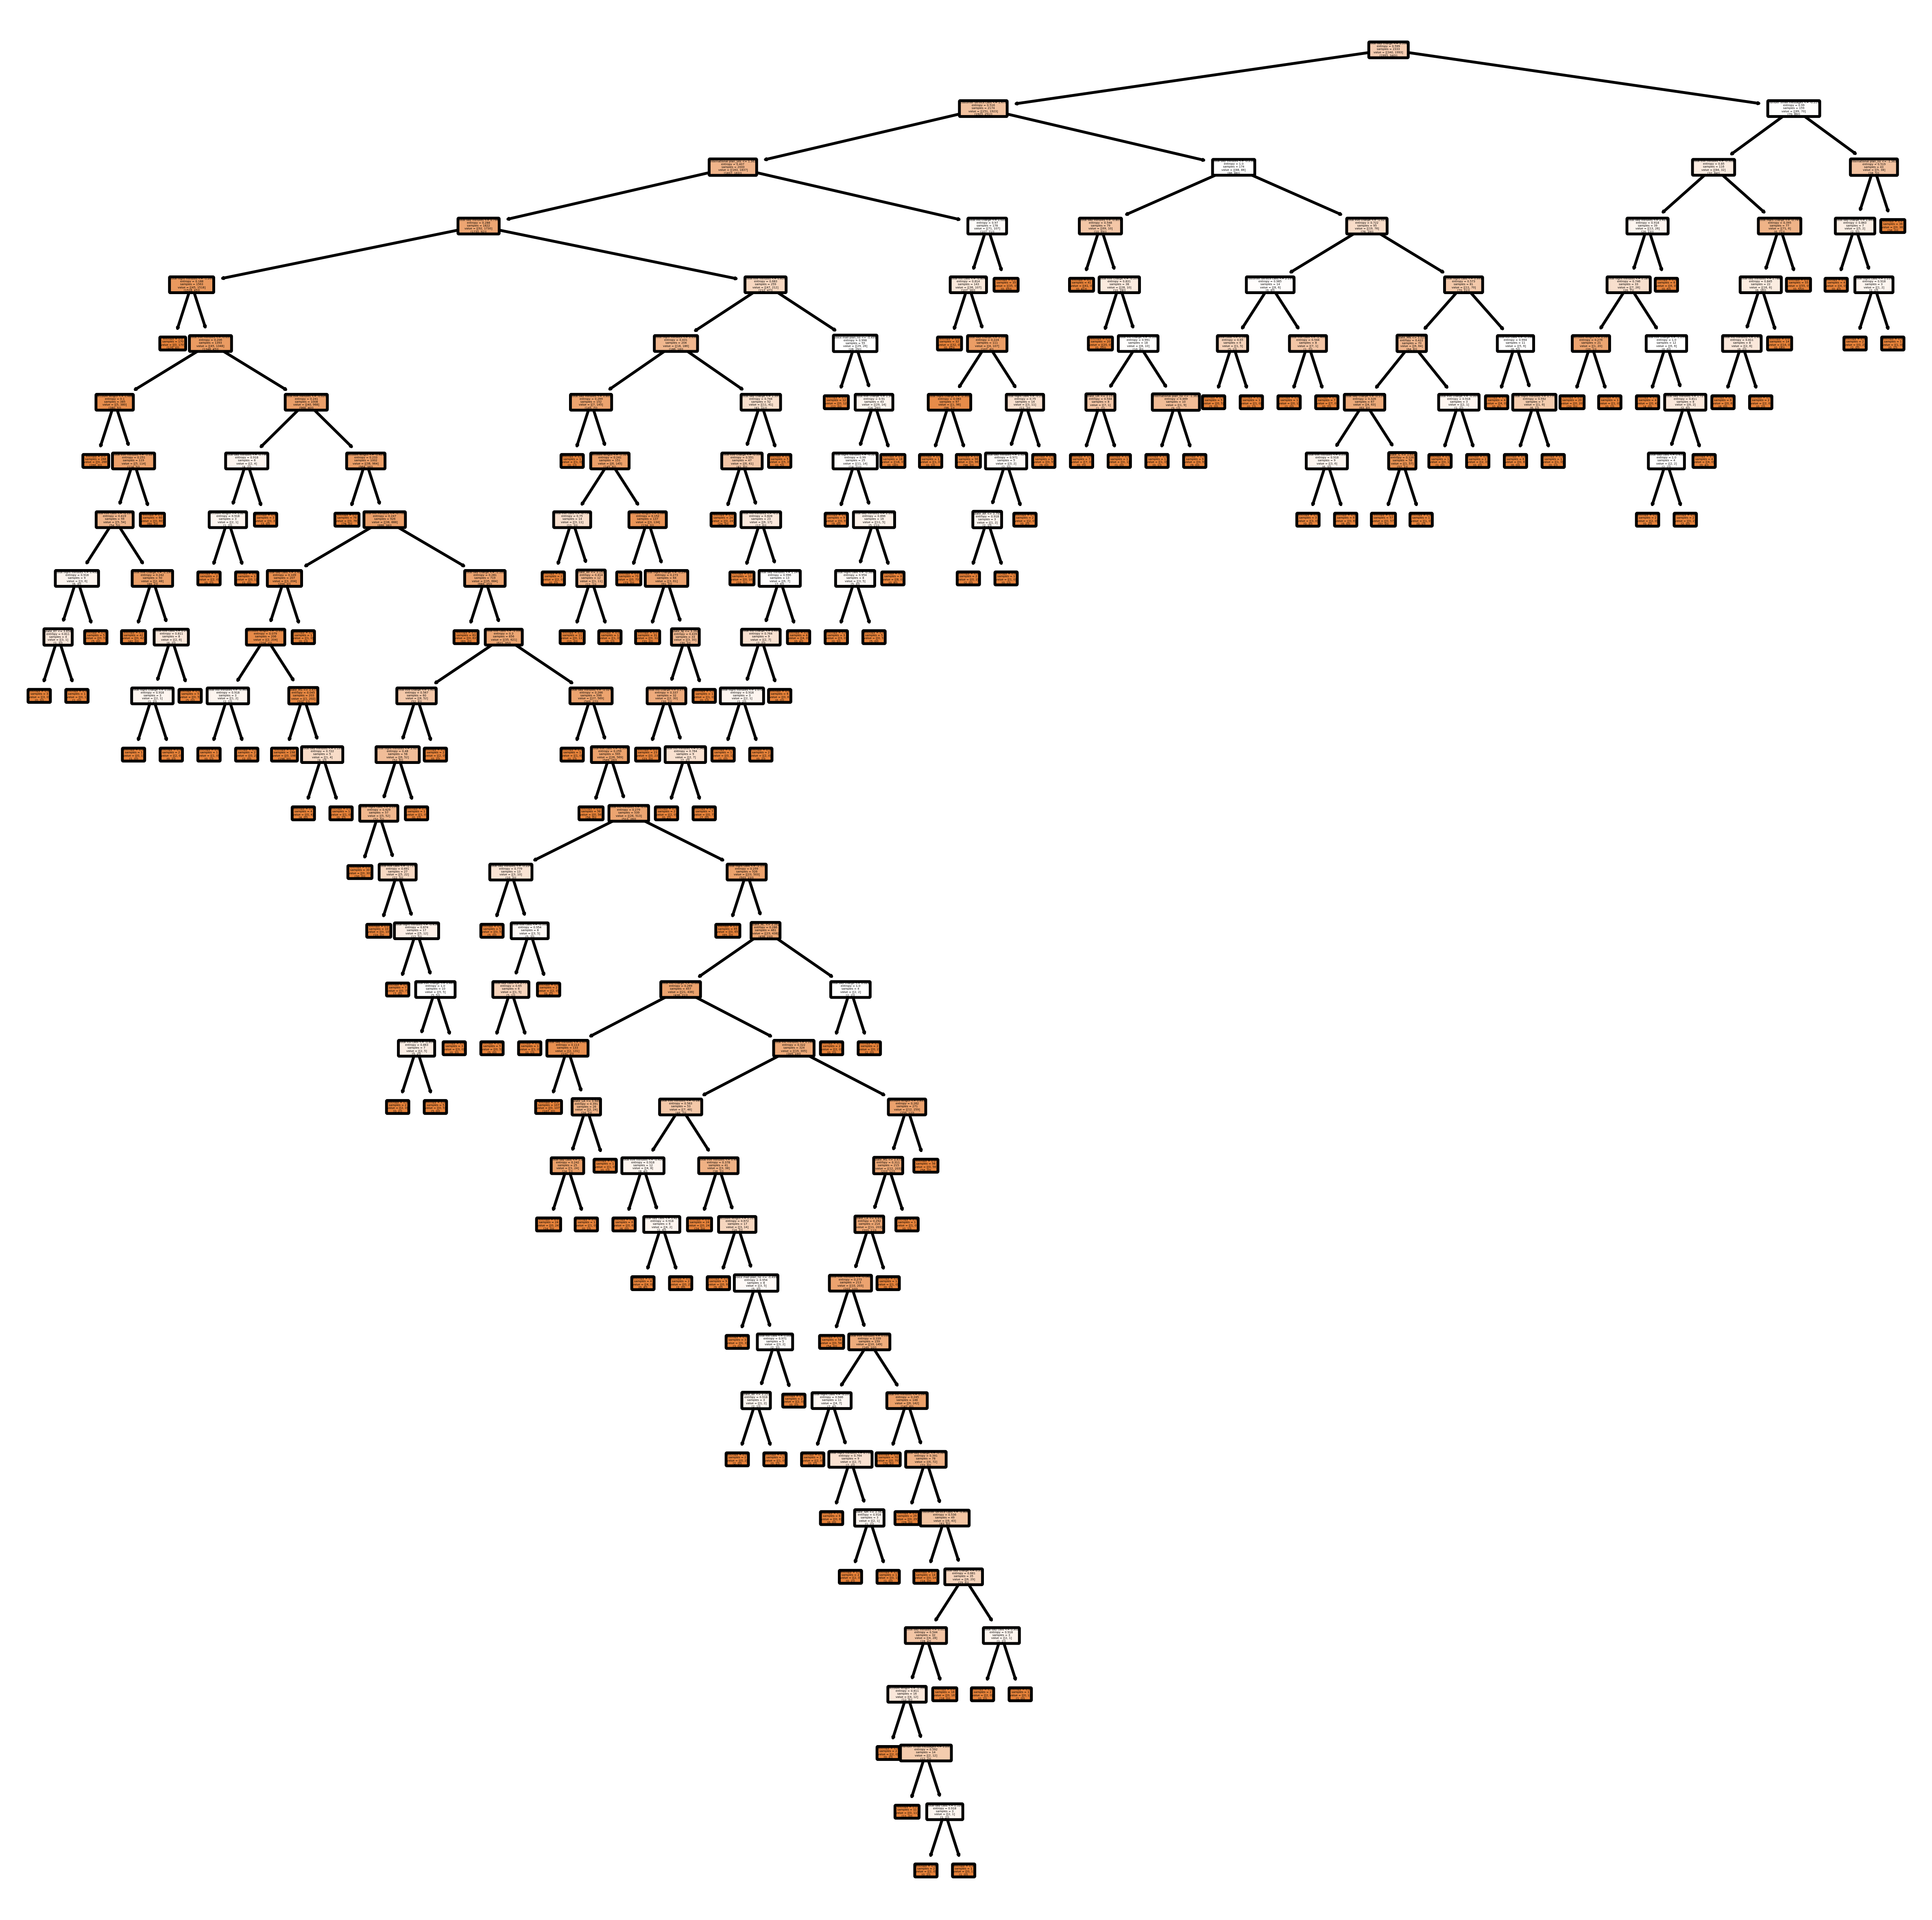

In [125]:
# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(clf, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

# Model Performance

In [181]:
#check for accuracy score
def model_accuracy(y_pred, y_test):
    return accuracy_score(y_pred, y_test)
    
#call the function

print(model_accuracy(y_pred, y_test))

0.913


- The accuracy of 0.913 indicates the proportion of correct predictions made by the model. An accuracy of 91.3% implies that the model correctly classified 91.3% of the instances in the dataset.

- I got an accuracy of 0.916 indicating the overall correctness of the model's predictions, where approximately 91.1% of the predictions were correct.

In [182]:
#check for precision
def model_precision(y_pred, y_test):
    precision = precision_score(y_pred, y_test, average ='macro')
    return precision

#call the function
print('precision score:',model_precision(y_pred, y_test))
    

precision score: 0.8239794044928234


- I got a  precision score of 0.823 indicating  that out of all the customers predicted as churned, approximately 82.9% were actually churned customers. This means that the model has a relatively low rate of false positives, correctly identifying actual churned customers.

In [183]:
#check for precision
def model_precision(y_pred, y_test):
    precision = precision_score(y_pred, y_test, average ='macro')
    return precision

#call the function
print('precision score:',model_precision(y_pred, y_test))
    

precision score: 0.8239794044928234


- I recall score of 0.824 indicating that my model was able to correctly identify approximately 81.6% of the actual churned customers out of all the customers who churned.Hence, it has a good ability to capture churned customers, minimizing false negatives.

In [184]:
def calculate_f1_score(y_true, y_pred):
    # Calculate the macro-averaged F1 score
    f1 = f1_score(y_true, y_pred, average='macro')
    
    return f1
# Calculate macro-averaged F1 score for the predictions
macro_f1 = calculate_f1_score(y_test, y_pred)

# Print the macro-averaged F1 score
print("F1 score:", macro_f1)

F1 score: 0.8230380102149784


- I got the  F1 score of 0.823 which is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, indicating that the model achieved a good balance between minimizing false positives and false negatives,  thus the model was effective

- This model is able to predict churn  with a high accuracy and precision, and that it has a good balance between precision and recall. This means that the model was effective 
-  the decision tree model appears to have performed well in predicting customer churn, achieving a good balance between precision and recall. However, it is essential to consider other evaluation metrics and domain-specific factors to assess the model's performance comprehensively. Additionally, further analysis, such as feature importance or model comparison, can provide additional insights into the model's effectiveness and potential areas of improvement.
- 

# Calculating feature importance 

completed splitting data
                   Feature  Importance
5         total day charge    0.215785
15  customer service calls    0.104525
6        total eve minutes    0.083634
70  international plan_yes    0.083386
13        total intl calls    0.074668
..                     ...         ...
40                state_MO    0.000000
17                state_AL    0.000000
42                state_MT    0.000000
19                state_AZ    0.000000
35                state_MA    0.000000

[71 rows x 2 columns]


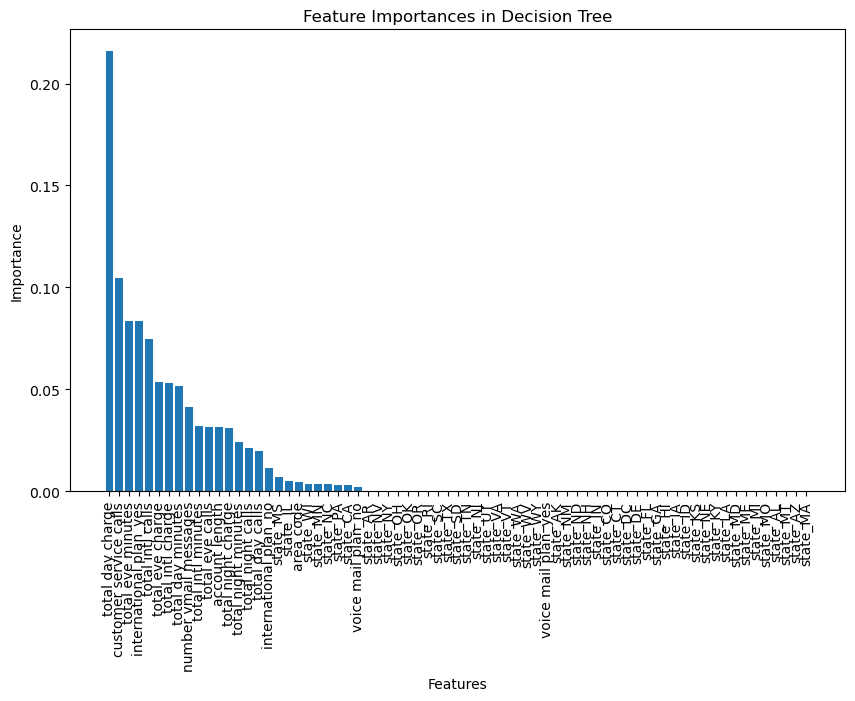

In [208]:


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=42)
print('completed splitting data')

# Create and fit the decision tree model
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance (descending order)
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)


# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.show()

Important features  for my model
- total day charge
- customer service calls
- total eve minutes
- international plan no
- tota intl charge

# Random Forest

In [240]:
#instantiate a RandomForestClassifier
r_clf = RandomForestClassifier(n_estimators=100, max_depth=5)

model= r_clf.fit(X_train, y_train)

# Model Evaluation

In [241]:
#fit the model to testing data
y_pred = model.predict(X_test)
y_pred

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

# Model performance

In [242]:
#check for accuracy score
def model_accuracy(y_pred, y_test):
    return accuracy_score(y_pred, y_test)
    
#call the function

print(model_accuracy(y_pred, y_test))

0.877


- The accuracy of 0.877 indicates the proportion of correct predictions made by the model. An accuracy of 91.3% implies that the model correctly classified 87.7% of the instances in the dataset

In [243]:
#check for precision
def model_precision(y_pred, y_test):
    precision = precision_score(y_pred, y_test, average ='macro')
    return precision

#call the function
print('precision score:',model_precision(y_pred, y_test))
    

precision score: 0.5699300699300699


- A precision score of 0.5699300699300699 in a random forest model for predicting customer churn suggests that the model has a moderate ability to accurately identify true positive cases out of all instances predicted as positive. Precision measures the proportion of correctly predicted positive instances, and in this case, it indicates that around 56.99% of the predicted positive instances are correct.

In [244]:
#calculating the f1 score

def calculate_f1_score(y_test, y_pred, average='macro'):
    f1 = f1_score(y_test, y_pred, average=average)
    return f1

#call the function
f1 = calculate_f1_score(y_test, y_pred)
print("F1 score:", f1)



F1 score: 0.5892208889527137


- This suggests that my model may be overfitting to the majority class or underfitting to the minority class or both. This may also indicate that your data is imbalanced, meaning that there are more examples of one class than another. Accuracy is not a good metric for imbalanced classification problems, as it can be misleading and mask the true performance of the model.
- This can result in poor generalization performance when the model is applied to new data.

-  Since my initial random forest algorithm was overfitting i tuned the hyper parametrs by increasing the number of estimators 
   to 200  and max depth  from 5 to 10


# Random forest 

- Random forest with tuned hyperparameters

In [213]:
#instantiate a RandomForestClassifier
r_clf = RandomForestClassifier(n_estimators=200, max_depth=10)

model= r_clf.fit(X_train, y_train)

# Model evaluation

In [214]:
# Make predictions for test data
y_pred = r_clf.predict(X_test)
y_pred

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

# Model  Performance after parameter tuning

- iIncreased the number of n_estimators from 100 to 200 and max depth from 5 to 10

In [215]:
#calculating the f1 score

def calculate_f1_score(y_test, y_pred, average='macro'):
    f1 = f1_score(y_test, y_pred, average=average)
    return f1

#call the function
f1 = calculate_f1_score(y_test, y_pred)
print("F1 score:", f1)


F1 score: 0.804778185808957


An F1 score of 0.8048 suggests that the model has a good balance between precision and recall.

In [216]:
#check for precision
def model_precision(y_pred, y_test):
    precision = precision_score(y_pred, y_test, average ='macro')
    return precision

#call the function
print('precision score:',model_precision(y_pred, y_test))
    

precision score: 0.7412587412587412


In [ ]:
- 

- 

In [217]:
#check for accuracy score
def model_accuracy(y_pred, y_test):
    return accuracy_score(y_pred, y_test)
    
#call the function

print(model_accuracy(y_pred, y_test))

0.926


- An accuracy of 0.926 suggests that the model is making correct predictions for a high proportion of the data.

-  An accuracy of 0.926 suggests that the model is making correct predictions for a high proportion of the data.Accuracy measures the proportion of correctly classified instances out of the total number of instances. In this case, the model has successfully predicted churn and non-churn cases with a high level of accuracy, indicating its effectiveness in distinguishing between the two classes. 

- These performance metrics indicate that the random forest model has demonstrated strong predictive power in identifying potential customer churn. The high F1 score and accuracy suggest that the model is capable of accurately predicting churn, which can be valuable for businesses in terms of understanding customer behavior and implementing targeted strategies to retain customers and minimize churn.
​

# Logistic Regression

In [22]:
#instantiate  Logistic regression

logreg = LogisticRegression()

# Ensure y_train is a 1-dimensional array
y_train = y_train.squeeze()

# Create a MultiOutputClassifier with logistic regression
multi_logreg = MultiOutputClassifier(logreg)

model_log = multi_logreg.fit(X_train, y_train)
model_log

MultiOutputClassifier(estimator=LogisticRegression())

# Model Evaluation

In [23]:
#Fit  the the data

y_pred = multi_logreg.predict(X_test)
y_pred

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

# Model Performance

In [25]:
#check for accuracy score
def model_accuracy(y_pred, y_test):
    return accuracy_score(y_pred, y_test)
    
#call the function

print(model_accuracy(y_pred, y_test))

0.863


- The accuracy of 0.863 indicates the proportion of correct predictions made by the model. An accuracy of 91.3% implies that the model correctly classified 86.3% of the instances in the dataset

In [27]:
#check for precision
def model_recall(y_pred, y_test):
    return recall_score(y_pred, y_test, average='macro')

#call the function
print('recall_score:',model_recall(y_pred, y_test))


recall_score: 0.7164893617021277


- precision score of 0.716 indicating that out of all the customers predicted as churned, approximately 71.6% were actually churned customers. This means that the model has a relatively low rate of false positives, correctly identifying actual churned customers

In [32]:
# Calculate recall score
recall = recall_score(y_test, y_pred, average = 'macro')

# Print the recall score
print("Recall score:", recall) 

Recall score: 0.5996319899470425


- the logistic regression model has a reasonably good accuracy of 0.863, indicating that it classifies the majority of instances correctly. However, the precision score of 0.5996 suggests that the model may have a moderate number of false positive predictions. The recall score of 0.7165 indicates that the model performs reasonably well in capturing positive instances but may still miss some positives, leading to false negatives

In [28]:


# Calculate classification report
classification_metrics = classification_report(y_test, y_pred)

# Print the classification report
print(classification_metrics)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.55      0.23      0.33       143

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.72      0.60      0.62      1000
weighted avg       0.84      0.86      0.84      1000
 samples avg       0.86      0.86      0.86      1000



- The report shows that the model performed well on predicting class 0 (no churn), with high precision (0.88), recall (0.97) and f1-score (0.92). However, the model performed poorly on predicting class 1 (churn), with low precision (0.55), recall (0.23) and f1-score (0.33). This means that the model was able to correctly identify most of the customers who did not churn, but missed many of the customers who did churn and also misclassified some of the non-churners as churners.

- The report  also shows that the micro, macro and weighted averages are similar for precision, recall and f1-score, with values around 0.86, 0.72 and 0.84 respectively. The samples average is also similar to the micro average, with values around 0.86. These averages indicate that the model performed moderately well on predicting customer churn overall, but not very well on predicting churn for individual customers or classes.